In [5]:
#!pip install --upgrade pip
#!pip uninstall -y tensorflow-gpu
!pip install tensorflow-gpu==2.5.3
#%tensorflow_version 2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 50.4 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.3 MB/s eta 0:00:0031m128.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462

    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.


Улучшение работы на MNIST

Подключаем библиотеки и подгружаем данные

In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2022-07-17 00:55:13.721621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Found GPU at: /device:GPU:0


2022-07-17 00:55:16.534276: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-17 00:55:16.552660: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-07-17 00:55:16.650480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.8095GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2022-07-17 00:55:16.650569: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-17 00:55:16.686702: I tensorflow/stream_executor/platform/default

In [2]:
tf.test.gpu_device_name()

2022-07-17 00:55:18.370328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.8095GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s


'/device:GPU:0'

2022-07-17 00:55:18.370960: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-07-17 00:55:18.371018: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-07-17 00:55:18.371034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2022-07-17 00:55:18.371048: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2022-07-17 00:55:18.371670: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/device:GPU:0 with 6954 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:65:00.0, compute capability: 6.1)


In [3]:
# Проверим, что ГПУ включился
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

2022-07-17 00:55:18.920648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.8095GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2022-07-17 00:55:18.921254: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-07-17 00:55:18.921318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-07-17 00:55:18.921333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2022-07-17 00:55:18.921346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2022-07-17 00:55:18.921925: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/device:GPU:0 with 6954 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:65:00.0, compute capability: 6.1)
202

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.5067932050001218
GPU (s):
0.025893863000419515
GPU speedup over CPU: 19x


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# сразу подключим оптимизаторы, слои и прочее
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Загружаем исходные данные

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

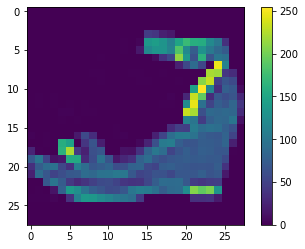

In [15]:
plt.figure()
plt.imshow(train_images[8839])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

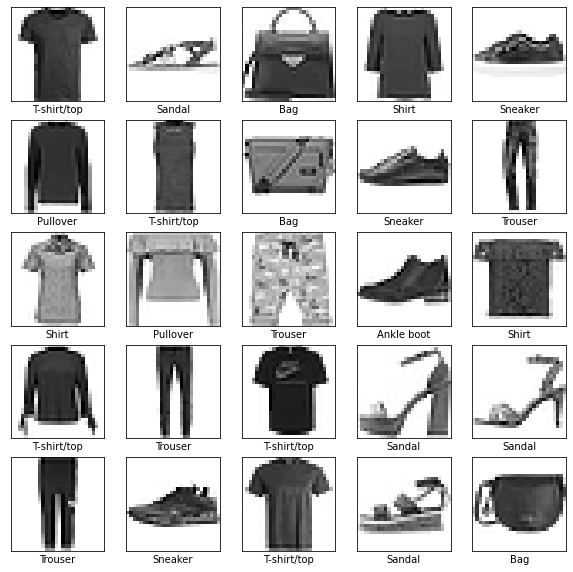

In [17]:
plt.figure(figsize=(10,10))
for i in range(154,179):
    plt.subplot(5,5,i+1-154)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Строим ИНС
Помня о том, что во второй работе увеличение колиества нейронов в слое не давало высокого прироста, а чрезмерное увеличение количества слоёв увеличивало переобучение, применим копромисное решение.

<strong>Вывод первый интересный: как и в биологической системе, в информационной решающее значение оказвыает число узлов нейронов - синапсов. Это увеличивает разнообразие возможных состояний сети.</strong>

<strong>Наблюдение из прошлого дз : чем больше нейронных связей, тем больше (до определённого предела) потребуется эпох, чтобы ИНС обучилась. Смотреть за переобучением можно с использованием <i>не рассмотренной на лекции</i> callback функции monitor. </strong> Реализовывать не стал - не успел.


In [18]:
# Количество слоёв выбиралось исходя из уменьшения вдвое числа входов
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(392, activation='relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(196, activation='relu'),
    keras.layers.Dense(98, activation='relu'),
    keras.layers.Dense(49, activation='relu'),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(10)
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 392)               307720    
_________________________________________________________________
layer_normalization_1 (Layer (None, 392)               784       
_________________________________________________________________
dense_6 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_7 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_8 (Dense)              (None, 49)                4851      
_________________________________________________________________
dropout_1 (Dropout)          (None, 49)               

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# Путём тестов выяснил, что аккуратность не растёт сильно после 32 эпохи
model.fit(train_images, y_train_labels, epochs=32, batch_size=64)

2022-07-13 23:35:36.832916: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-13 23:35:36.853589: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3299990000 Hz


Epoch 1/32
938/938 [==============================] - 4s 4ms/step - loss: 0.5183 - accuracy: 0.8136
Epoch 2/32
938/938 [==============================] - 4s 4ms/step - loss: 0.3828 - accuracy: 0.8611
Epoch 3/32
938/938 [==============================] - 4s 4ms/step - loss: 0.3416 - accuracy: 0.8752
Epoch 4/32
938/938 [==============================] - 4s 4ms/step - loss: 0.3194 - accuracy: 0.8829
Epoch 5/32
938/938 [==============================] - 4s 4ms/step - loss: 0.2989 - accuracy: 0.8907
Epoch 6/32
938/938 [==============================] - 4s 4ms/step - loss: 0.2827 - accuracy: 0.8967
Epoch 7/32
938/938 [==============================] - 4s 4ms/step - loss: 0.2726 - accuracy: 0.8988
Epoch 8/32
938/938 [==============================] - 4s 4ms/step - loss: 0.2592 - accuracy: 0.9041
Epoch 9/32
938/938 [==============================] - 4s 4ms/step - loss: 0.2498 - accuracy: 0.9063
Epoch 10/32
938/938 [==============================] - 4s 4ms/step - loss: 0.2401 - accuracy: 0.9101

In [22]:
# Добившись немного лучших показателей, чем на лекции, решил остановиться на этом варианте сети
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4305 - accuracy: 0.8936

Test accuracy: 0.8935999870300293


In [23]:
y_p = model.predict(test_images[:1,:,:])
y_p

array([[-3.2288868e+01, -2.5852978e+01, -1.8122808e+01, -2.0648790e+01,
        -1.7803663e+01, -9.5641642e+00, -1.4057099e+01,  3.6131460e-03,
        -2.9187920e+01,  1.1568363e+01]], dtype=float32)

In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [7]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

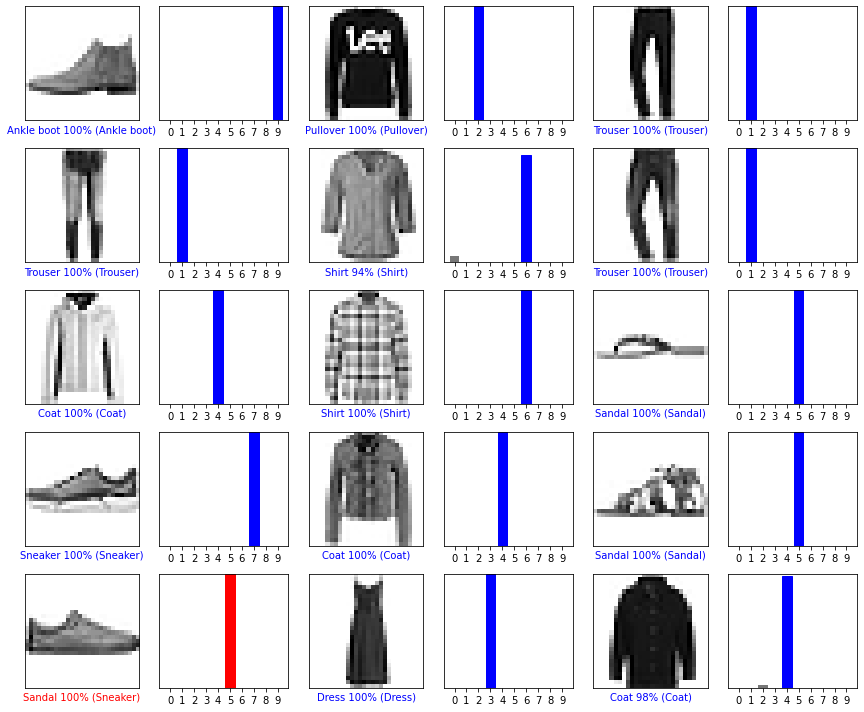

In [29]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Теперь поработаем с тестами разных оптимизаторов для подобранной сети

In [6]:
import pandas as pd
from datetime import datetime
from tensorflow.keras import initializers

In [31]:
columns_1 = ("adam", "sgd", "rmsprop", "adagrad")
models_loss = pd.DataFrame(columns=columns_1)
models_acc = pd.DataFrame(columns=columns_1)

In [32]:
optimizers = ["adam", "sgd", "rmsprop", "adagrad"]

## Выполняем эксперимент на определение лучшего оптимизатора
Эксперимент будет выпоняться 15 раз с разными seed для усреднения при разных начальных состояниях. 
Записываем loss, acc.

Далее результат будет усреднён и выбрана модель с наилучшей комбинацией loss-acc. Учитываться будут средние значения и дисперсии.

In [ ]:
# Количество слоёв выбиралось исходя из уменьшения вдвое числа входов
for i in range(1,16):
  for opt in optimizers:
    print(f"Выполняется проход {i}, оптимизатор {opt}")
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(392, activation='relu',
                           kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                  stddev=0.15, 
                                      seed=int(datetime.now().timestamp()))),
        keras.layers.Dense(196, activation='relu',
                           kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                  stddev=0.15, 
                                      seed=int(datetime.now().timestamp()))),
        keras.layers.LayerNormalization(),                      
        keras.layers.Dense(98, activation='relu',
                           kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                  stddev=0.15, 
                                      seed=int(datetime.now().timestamp()))),
        keras.layers.Dense(49, activation='relu',
                           kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                  stddev=0.15, 
                                      seed=int(datetime.now().timestamp()))),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(10,
                           kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                  stddev=0.15, 
                                      seed=int(datetime.now().timestamp())))
    ])

    model.compile(optimizer=opt,
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, y_train_labels, epochs=32, batch_size=64, verbose=0)

    test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
    models_loss.loc[i, opt] = test_loss
    models_acc.loc[i, opt] = test_acc

Выполняется проход 1, оптимизатор adam
313/313 - 1s - loss: 0.4483 - accuracy: 0.8929 - 1s/epoch - 4ms/step
Выполняется проход 1, оптимизатор sgd
313/313 - 1s - loss: 0.3916 - accuracy: 0.8650 - 798ms/epoch - 3ms/step
Выполняется проход 1, оптимизатор rmsprop
313/313 - 1s - loss: 0.6081 - accuracy: 0.8710 - 784ms/epoch - 3ms/step
Выполняется проход 1, оптимизатор adagrad
313/313 - 1s - loss: 0.4295 - accuracy: 0.8485 - 798ms/epoch - 3ms/step
Выполняется проход 2, оптимизатор adam
313/313 - 1s - loss: 0.3922 - accuracy: 0.8927 - 772ms/epoch - 2ms/step
Выполняется проход 2, оптимизатор sgd
313/313 - 1s - loss: 0.3621 - accuracy: 0.8706 - 779ms/epoch - 2ms/step
Выполняется проход 2, оптимизатор rmsprop
313/313 - 1s - loss: 0.5542 - accuracy: 0.8790 - 788ms/epoch - 3ms/step
Выполняется проход 2, оптимизатор adagrad
313/313 - 1s - loss: 0.4282 - accuracy: 0.8489 - 800ms/epoch - 3ms/step
Выполняется проход 3, оптимизатор adam
313/313 - 1s - loss: 0.4744 - accuracy: 0.8896 - 799ms/epoch - 3ms

In [ ]:
models_loss.astype(np.float64).describe()


,adam,sgd,rmsprop,adagrad
count,15.000000,15.000000,15.000000,15.000000
mean,0.424011,0.366776,0.565012,0.430075
std,0.022704,0.009339,0.063722,0.004130
min,0.392230,0.352472,0.463690,0.423553
25%,0.408602,0.362104,0.522091,0.427932
50%,0.419294,0.367353,0.566726,0.429560
75%,0.440967,0.370855,0.590798,0.430601
max,0.474427,0.391631,0.719102,0.439911


In [ ]:
models_acc.astype(np.float64).describe()

,adam,sgd,rmsprop,adagrad
count,15.000000,15.000000,15.000000,15.000000
mean,0.893073,0.870167,0.879607,0.846207
std,0.002964,0.003079,0.009146,0.003028
min,0.887900,0.865000,0.857500,0.839500
25%,0.890650,0.868200,0.876500,0.844450
50%,0.893100,0.869800,0.879000,0.846400
75%,0.894500,0.872850,0.887350,0.848700
max,0.898200,0.874600,0.890800,0.851300


По совокупности факторов (самая лучшая accuracy и самый низкий разброс accuracy) лучшим оптимизатором для этой сети выходит adam.
следующие эксперименты будут использовать этот оптимизатор, кроме эксперимента с разными функциями потерь

<strong>Наблюдение 2: У Adam самый высокий разброс loss, но низкий разброс Accuracy значений. Возможно, следовало выбрать adagrad, т.к. высокий разброс может говорить о низкой стабильности сети - при разных начальных условиях получаем разные результаты. </strong>

#Выполняем эксперимент на выявление лучшей структуры ИНС

Текущую модель примем за базовую и выполним проверку с моделями, у которых:
1. Добавлены два слоя на перед первым (392*4,392*2)
2. Добавлен слой перед первым (392*2)
3. Убран первый слой 
4. Убран первый и второй слои


In [ ]:
columns_2 = ("x4", "x2", "baseline", "x0.5", "x0.25")
models_loss = pd.DataFrame(columns=columns_2)
models_acc = pd.DataFrame(columns=columns_2)

In [ ]:
models_acc

,x4,x2,baseline,x0.5,x0.25


In [ ]:
models_loss

,x4,x2,baseline,x0.5,x0.25


In [ ]:
print(392*4)
print(392*2)

1568
784


In [ ]:
# Добившись немного лучших показателей, чем на лекции, решил остановиться на этом варианте сети
for i in range(1, 16):
  print(f"Выполняется проход {i} сеть х4")
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(1568, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(784, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(392, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),                      
      keras.layers.Dense(196, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(98, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(49, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dropout(0.15),
      keras.layers.Dense(10,
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp())))
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  model.fit(train_images, y_train_labels, epochs=64, batch_size=64, verbose=0)

  test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
  models_loss.loc[i, "x4"] = test_loss
  models_acc.loc[i, "x4"] = test_acc

  print(f"Выполняется проход {i} сеть х2")
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(784, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(392, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),                      
      keras.layers.Dense(196, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(98, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(49, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dropout(0.15),                      
      keras.layers.Dense(10,
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp())))
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  model.fit(train_images, y_train_labels, epochs=32, batch_size=64, verbose=0)

  test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
  models_loss.loc[i, "x2"] = test_loss
  models_acc.loc[i, "x2"] = test_acc

  print(f"Выполняется проход {i} сеть baseline")
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(392, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(196, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),                      
      keras.layers.Dense(98, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(49, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dropout(0.15),
      keras.layers.Dense(10,
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp())))
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  model.fit(train_images, y_train_labels, epochs=32, batch_size=64, verbose=0)

  test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
  models_loss.loc[i, "baseline"] = test_loss
  models_acc.loc[i, "baseline"] = test_acc
 
  print(f"Выполняется проход {i} сеть x0.5")
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(196, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dense(98, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),                      
      keras.layers.Dense(49, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dropout(0.15),
      keras.layers.Dense(10,
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp())))
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  model.fit(train_images, y_train_labels, epochs=32, batch_size=64, verbose=0)

  test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
  models_loss.loc[i, "x0.5"] = test_loss
  models_acc.loc[i, "x0.5"] = test_acc

  print(f"Выполняется проход {i} сеть x0.25")
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(98, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),                      
      keras.layers.Dense(49, activation='relu',
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp()))),
      keras.layers.Dropout(0.15),
      keras.layers.Dense(10,
                          kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                stddev=0.15, 
                                    seed=int(datetime.now().timestamp())))
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  model.fit(train_images, y_train_labels, epochs=32, batch_size=64, verbose=0)

  test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
  models_loss.loc[i, "x0.25"] = test_loss
  models_acc.loc[i, "x0.25"] = test_acc


Выполняется проход 1 сеть х4
313/313 - 1s - loss: 0.6112 - accuracy: 0.9020 - 827ms/epoch - 3ms/step
Выполняется проход 1 сеть х2
313/313 - 1s - loss: 0.4351 - accuracy: 0.8890 - 840ms/epoch - 3ms/step
Выполняется проход 1 сеть baseline
313/313 - 1s - loss: 0.4216 - accuracy: 0.8922 - 799ms/epoch - 3ms/step
Выполняется проход 1 сеть x0.5
313/313 - 1s - loss: 0.4054 - accuracy: 0.8933 - 762ms/epoch - 2ms/step
Выполняется проход 1 сеть x0.25
313/313 - 1s - loss: 0.3871 - accuracy: 0.8882 - 762ms/epoch - 2ms/step
Выполняется проход 2 сеть х4
313/313 - 1s - loss: 0.6401 - accuracy: 0.8993 - 831ms/epoch - 3ms/step
Выполняется проход 2 сеть х2
313/313 - 1s - loss: 0.4056 - accuracy: 0.8951 - 805ms/epoch - 3ms/step
Выполняется проход 2 сеть baseline
313/313 - 1s - loss: 0.3973 - accuracy: 0.8981 - 785ms/epoch - 3ms/step
Выполняется проход 2 сеть x0.5
313/313 - 1s - loss: 0.4245 - accuracy: 0.8846 - 775ms/epoch - 2ms/step
Выполняется проход 2 сеть x0.25
313/313 - 1s - loss: 0.4039 - accuracy: 

In [ ]:
models_loss.astype(np.float64).describe()

,x4,x2,baseline,x0.5,x0.25
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.606862,0.419843,0.438274,0.416537,0.386258
std,0.050870,0.016814,0.021666,0.020654,0.014664
min,0.529774,0.382618,0.397329,0.386242,0.362519
25%,0.567866,0.412312,0.423196,0.399246,0.376396
50%,0.611223,0.423528,0.441076,0.415673,0.387106
75%,0.643797,0.431316,0.448422,0.431075,0.394917
max,0.689412,0.447593,0.485010,0.452607,0.413379


In [ ]:
print(12345)

In [ ]:
models_acc.astype(np.float64).describe()

,x4,x2,baseline,x0.5,x0.25
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.898973,0.894567,0.893313,0.890947,0.885513
std,0.002378,0.003546,0.002618,0.002807,0.002710
min,0.893800,0.887400,0.889800,0.884600,0.881300
25%,0.897700,0.891900,0.890950,0.889200,0.882850
50%,0.899300,0.895600,0.892800,0.891900,0.885400
75%,0.900450,0.897300,0.895050,0.892900,0.887550
max,0.902600,0.898700,0.898100,0.894900,0.890600


Модель x0.25 показала наилучшие результаты по значению функции потерь: у неё самый низкий показатель функции и самый низкий разброс при разных начальных значениях. У сети baseline самые лучшие показатели по accuracy. Так как сеть 0.25х меньше, чем baseline, она будет использована при проверках разных функций потерь

# Выполняем тестирование функций потерь

In [33]:
models_loss = pd.DataFrame(columns=columns_1)
models_acc = pd.DataFrame(columns=columns_1)

models_loss_std = pd.DataFrame(columns=columns_1)
models_acc_std = pd.DataFrame(columns=columns_1)

In [34]:
models_loss

,adam,sgd,rmsprop,adagrad


In [35]:
models_loss_std

,adam,sgd,rmsprop,adagrad


In [36]:
models_acc

,adam,sgd,rmsprop,adagrad


In [37]:
models_acc_std

,adam,sgd,rmsprop,adagrad


In [38]:
optimizers

['adam', 'sgd', 'rmsprop', 'adagrad']

In [39]:
catcrosstrue = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
catcrossfalse = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cathinge = tf.keras.losses.CategoricalHinge()
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
poison = tf.keras.losses.Poisson()
kld = tf.keras.losses.KLDivergence()
losses = [catcrosstrue, catcrossfalse, cathinge, cathinge, mae, mse, msle, poison, kld]
losses_names = ["catcrosstrue", "catcrossfalse", "cathinge", "cathinge", "mae", "mse", "msle", "poison", "kld"]
losses

In [40]:
losses_names

['catcrosstrue',
 'catcrossfalse',
 'cathinge',
 'cathinge',
 'mae',
 'mse',
 'msle',
 'poison',
 'kld']

**Текст, выделенный полужирным шрифтом**

In [41]:
for j,ls in enumerate(losses):
  for opt in optimizers:
    loss_tst = []
    acc_tst = []
    for i in range(1,16):
      print(f"Выполняется проход {i} сеть x0.25, оптимизатор {opt}, \
      функция потерь {ls}")
      model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(98, activation='relu',
                              kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                    stddev=0.15, 
                                        seed=int(datetime.now().timestamp()))),
          keras.layers.LayerNormalization(),                      
          keras.layers.Dense(49, activation='relu',
                              kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                    stddev=0.15, 
                                        seed=int(datetime.now().timestamp()))),
          keras.layers.Dropout(0.15),
          keras.layers.Dense(10,
                              kernel_initializer=initializers.RandomNormal(mean=0.0, 
                                                                    stddev=0.15, 
                                        seed=int(datetime.now().timestamp())))
      ])

      model.compile(optimizer=opt,
                    loss=ls,
                    metrics=['accuracy'])

      model.fit(train_images, y_train_labels, epochs=64, batch_size=64, verbose=0)

      test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)
      loss_tst.append(test_loss)
      acc_tst.append(test_acc)

    
    models_loss.loc[losses_names[j], opt] = np.array(loss_tst).mean()
    models_acc.loc[losses_names[j], opt] = np.array(test_acc).mean()
    models_loss_std.loc[losses_names[j], opt] = np.array(loss_tst).std()
    models_acc_std.loc[losses_names[j], opt] = np.array(test_acc).std()

Выполняется проход 1 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.4945 - accuracy: 0.8875
Выполняется проход 2 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.4988 - accuracy: 0.8867
Выполняется проход 3 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.4755 - accuracy: 0.8891
Выполняется проход 4 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.5214 - accuracy: 0.8839
Выполняется проход 5 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.5093 - accuracy: 0.

313/313 - 1s - loss: 0.5273 - accuracy: 0.8807
Выполняется проход 12 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.4997 - accuracy: 0.8789
Выполняется проход 13 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.5232 - accuracy: 0.8847
Выполняется проход 14 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.5056 - accuracy: 0.8793
Выполняется проход 15 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5f10>
313/313 - 1s - loss: 0.5002 - accuracy: 0.8775
Выполняется проход 1 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy ob

313/313 - 1s - loss: 8.0848 - accuracy: 0.1000
Выполняется проход 8 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5eb0>
313/313 - 1s - loss: 12.8945 - accuracy: 0.1000
Выполняется проход 9 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5eb0>
313/313 - 1s - loss: 9.6773 - accuracy: 0.1001
Выполняется проход 10 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5eb0>
313/313 - 1s - loss: 8.2573 - accuracy: 0.1393
Выполняется проход 11 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5eb0>
313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 12 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalCrossentropy object at 0x7f6e9c3e5eb0>

313/313 - 1s - loss: 0.2954 - accuracy: 0.8872
Выполняется проход 4 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3031 - accuracy: 0.8918
Выполняется проход 5 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3031 - accuracy: 0.8876
Выполняется проход 6 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.2904 - accuracy: 0.8892
Выполняется проход 7 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3016 - accuracy: 0.8881
Выполняется проход 8 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.2852 - 

313/313 - 1s - loss: 0.2949 - accuracy: 0.8879
Выполняется проход 1 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3884 - accuracy: 0.8268
Выполняется проход 2 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3868 - accuracy: 0.8314
Выполняется проход 3 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3892 - accuracy: 0.8280
Выполняется проход 4 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3976 - accuracy: 0.8255
Выполняется проход 5 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - 

313/313 - 1s - loss: 0.3044 - accuracy: 0.8656
Выполняется проход 13 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.2992 - accuracy: 0.8675
Выполняется проход 14 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3002 - accuracy: 0.8671
Выполняется проход 15 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3007 - accuracy: 0.8666
Выполняется проход 1 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3010 - accuracy: 0.8882
Выполняется проход 2 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.CategoricalHinge object at 0x7f6e9c3e5f40>
313/313 - 1s - loss: 0.3

313/313 - 1s - loss: 0.1001 - accuracy: 0.0998
Выполняется проход 10 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1002 - accuracy: 0.0999
Выполняется проход 11 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1001 - accuracy: 0.1001
Выполняется проход 12 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1001 - accuracy: 0.1000
Выполняется проход 13 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1001 - accuracy: 0.1002
Выполняется проход 14 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss:

313/313 - 1s - loss: 0.1002 - accuracy: 0.1011
Выполняется проход 7 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1003 - accuracy: 0.1015
Выполняется проход 8 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1003 - accuracy: 0.1018
Выполняется проход 9 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1003 - accuracy: 0.1007
Выполняется проход 10 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 - 1s - loss: 0.1003 - accuracy: 0.1029
Выполняется проход 11 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6e9c3e5ee0>
313/313 

313/313 - 1s - loss: 0.0174 - accuracy: 0.8901
Выполняется проход 4 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6e9c3e5f70>
313/313 - 1s - loss: 0.0174 - accuracy: 0.8906
Выполняется проход 5 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6e9c3e5f70>
313/313 - 1s - loss: 0.0178 - accuracy: 0.8904
Выполняется проход 6 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6e9c3e5f70>
313/313 - 1s - loss: 0.0173 - accuracy: 0.8920
Выполняется проход 7 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6e9c3e5f70>
313/313 - 1s - loss: 0.0185 - accuracy: 0.8824
Выполняется проход 8 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6e9c3e5f70>
313/313 - 1s - 

313/313 - 1s - loss: 0.0084 - accuracy: 0.8916
Выполняется проход 15 сеть x0.25, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0089 - accuracy: 0.8856
Выполняется проход 1 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0184 - accuracy: 0.7316
Выполняется проход 2 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0260 - accuracy: 0.5325
Выполняется проход 3 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0324 - accuracy: 0.4187
Выполняется проход 4 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError obje

313/313 - 1s - loss: 0.0297 - accuracy: 0.5163
Выполняется проход 10 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0423 - accuracy: 0.1904
Выполняется проход 11 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0445 - accuracy: 0.1901
Выполняется проход 12 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0300 - accuracy: 0.5115
Выполняется проход 13 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f6e9c3e5e80>
313/313 - 1s - loss: 0.0281 - accuracy: 0.5557
Выполняется проход 14 сеть x0.25, оптимизатор adagrad,       функция потерь <tensorflow.python.keras.losses.MeanSquar

313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 9 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.Poisson object at 0x7f6e9c3e5c70>
313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 10 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.Poisson object at 0x7f6e9c3e5c70>
313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 11 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.Poisson object at 0x7f6e9c3e5c70>
313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 12 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.Poisson object at 0x7f6e9c3e5c70>
313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 13 сеть x0.25, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.Poisson object at 0x7f6e9c3e5c70>
313/313 - 1s - loss: nan - accuracy: 0.1000
Выполняется проход 14 сеть 

Выполняется проход 7 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.KLDivergence object at 0x7f6e9c3e5460>
313/313 - 1s - loss: -1.4506e-05 - accuracy: 0.2918
Выполняется проход 8 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.KLDivergence object at 0x7f6e9c3e5460>
313/313 - 1s - loss: -1.4506e-05 - accuracy: 0.1000
Выполняется проход 9 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.KLDivergence object at 0x7f6e9c3e5460>
313/313 - 1s - loss: -1.4506e-05 - accuracy: 0.1689
Выполняется проход 10 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.KLDivergence object at 0x7f6e9c3e5460>
313/313 - 1s - loss: -1.4506e-05 - accuracy: 0.1000
Выполняется проход 11 сеть x0.25, оптимизатор sgd,       функция потерь <tensorflow.python.keras.losses.KLDivergence object at 0x7f6e9c3e5460>
313/313 - 1s - loss: -1.4502e-05 - accuracy: 0.1483
Выполняется проход 12 сеть x

In [42]:
models_loss
 

,adam,sgd,rmsprop,adagrad
catcrosstrue,0.50765,0.357499,0.490403,0.460973
catcrossfalse,NaN,NaN,NaN,6.123541
cathinge,0.299365,0.301989,0.307886,0.391848
mae,0.099103,0.09715,0.100456,0.100301
mse,0.017931,0.035379,0.017637,0.049711
msle,0.009076,0.026624,0.014366,0.034289
poison,NaN,NaN,NaN,NaN
kld,-0.000015,-0.000015,-0.000015,0.00115


In [43]:
models_acc


,adam,sgd,rmsprop,adagrad
catcrosstrue,0.8895,0.8726,0.8775,0.8372
catcrossfalse,0.1,0.1,0.1,0.1587
cathinge,0.8872,0.8666,0.8825,0.8259
mae,0.1,0.2746,0.1,0.1023
mse,0.89,0.7667,0.8845,0.7163
msle,0.8856,0.5774,0.8746,0.1961
poison,0.1,0.1,0.1,0.1
kld,0.1683,0.1666,0.3275,0.1245


In [44]:
models_loss_std


,adam,sgd,rmsprop,adagrad
catcrosstrue,0.021581,0.005391,0.023393,0.004196
catcrossfalse,NaN,NaN,NaN,2.07247
cathinge,0.011184,0.003789,0.01687,0.003629
mae,0.003785,0.003825,0.000078,0.000033
mse,0.00036,0.001937,0.000304,0.002301
msle,0.001236,0.006055,0.004141,0.005466
poison,NaN,NaN,NaN,NaN
kld,0.0,0.0,0.0,0.001327


In [45]:
models_acc_std

,adam,sgd,rmsprop,adagrad
catcrosstrue,0.0,0.0,0.0,0.0
catcrossfalse,0.0,0.0,0.0,0.0
cathinge,0.0,0.0,0.0,0.0
mae,0.0,0.0,0.0,0.0
mse,0.0,0.0,0.0,0.0
msle,0.0,0.0,0.0,0.0
poison,0.0,0.0,0.0,0.0
kld,0.0,0.0,0.0,0.0


# Вывод
Проведённый эксперимент показал, что опять для поиска лучших значений необходимо проверять абсолютно все параметры.
Не совсем ясно, до какого предела увеличивать "слойность" сети.
Предполагаю, что при изменении глубины слоёв будут разные значения для разных оптимизаторв, функций потерь и соответствующих функций активации.

Оптимизатор Adam показывает лучшие результаты по точности и потерям, но средние по разбросу (неустойчивости результатов при серии запусков) высокие.

Почему - не понятно.


# Работаем с данными sklearn.datasets import load_boston (Другой датасет)


In [8]:
data = tf.keras.datasets.boston_housing.load_data()

In [13]:
(train_x,train_y),(test_x,test_y) = data

In [48]:
train_x

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [49]:
model = tf.keras.models.Sequential([
Dense(169,"relu",input_shape=(train_x.shape[-1],)),
Dense(1)
])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [50]:
model.summary()

Model: "sequential_543"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1630 (Dense)           (None, 169)               2366      
_________________________________________________________________
dense_1631 (Dense)           (None, 1)                 170       
Total params: 2,536
Trainable params: 2,536
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(train_x, train_y, epochs=100, 
          validation_data=(test_x[51:],test_y[51:]))

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 240.1109 - mae: 11.2774 - val_loss: 134.2928 - val_mae: 9.6723
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 118.8312 - mae: 8.3088 - val_loss: 92.0188 - val_mae: 7.7371
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 110.2392 - mae: 7.6864 - val_loss: 85.2908 - val_mae: 7.5424
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 95.8766 - mae: 7.3780 - val_loss: 171.8048 - val_mae: 10.1126
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 123.3582 - mae: 8.8928 - val_loss: 167.0982 - val_mae: 11.3682
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 85.5662 - mae: 7.0741 - val_loss: 76.8668 - val_mae: 6.8146
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 102.5452 - mae: 7.9628 - val_loss: 178.4082 - val_mae: 10.6543
Epoch 8/100
13/13 [==============================] - 0s 

Epoch 62/100
13/13 [==============================] - 0s 6ms/step - loss: 67.5177 - mae: 6.5984 - val_loss: 125.3358 - val_mae: 9.5151
Epoch 63/100
13/13 [==============================] - 0s 6ms/step - loss: 59.8181 - mae: 6.1824 - val_loss: 42.3676 - val_mae: 5.2101
Epoch 64/100
13/13 [==============================] - 0s 6ms/step - loss: 52.2586 - mae: 5.7852 - val_loss: 132.6065 - val_mae: 9.8647
Epoch 65/100
13/13 [==============================] - 0s 6ms/step - loss: 73.8716 - mae: 6.9155 - val_loss: 40.0317 - val_mae: 5.0398
Epoch 66/100
13/13 [==============================] - 0s 6ms/step - loss: 68.1977 - mae: 6.4725 - val_loss: 47.1518 - val_mae: 5.7505
Epoch 67/100
13/13 [==============================] - 0s 6ms/step - loss: 76.7974 - mae: 7.0240 - val_loss: 41.0192 - val_mae: 4.5188
Epoch 68/100
13/13 [==============================] - 0s 6ms/step - loss: 66.0658 - mae: 6.2224 - val_loss: 59.6784 - val_mae: 6.8048
Epoch 69/100
13/13 [==============================] - 0s 6ms

In [52]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 2ms/step - loss: 46.5613 - mae: 4.9391


[46.56129455566406, 4.9390997886657715]

Текущий результат запишем как опорный и начнём экспериметы.

# Эксперимент с увеличением количества слоёв

Будет создано 5 разных ИНС:
1. Один слой, число нейронов 13
2. Один слой, число нейронов 26
3. Один слой, число нейронов 52
4. Один слой, число нейронов 13x13
5. Два слоя, число нейронов 13x13, 13
6. Два слоя, число нейронов 13x13, 13x13
7. Три слоя, число нейронов 52, 26, 13
8. Три слоя, число нейронов 13x13, 13x13, 13x13
9. Десять слоёв, число нейронов 13 в каждом
10. Десять слоёв, число нейронов 13x13 в каждом

Эксперимент будет запущен 15 раз каждый и вычислены среднее и дисперсии метрик. 
Фиксируем число эпох - 200 и критерий mae

Сначала работаем с relu, затем с sigmoid

In [53]:
columns_1 = [
             "1-13",
             "1-26",
             "1-52",
             "1-13x13",
             "1-13x13,2-13",
             "1-13x13,2-13x13",
             "1-52,2-26,3-13",
             "1-13x13,2-13x13,3-13x13",
             "x10-13",
             "x10-13x13"
]
models_loss = pd.DataFrame(columns=columns_1)
models_mae = pd.DataFrame(columns=columns_1)

# models_loss_std = pd.DataFrame(columns=columns_1)
# models_mae_std = pd.DataFrame(columns=columns_1)

In [54]:
models_loss

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13


In [55]:
for i in range (1,16):
  print(f"Выполняется проход {i}, сеть {columns_1[0]}")
  model = tf.keras.models.Sequential([
  Dense(13,"relu",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[0]] = loss
  models_mae.loc[i, columns_1[0]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[1]}")
  model = tf.keras.models.Sequential([
  Dense(26,"relu",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[1]] = loss
  models_mae.loc[i, columns_1[1]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[2]}")
  model = tf.keras.models.Sequential([
  Dense(52,"relu",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[2]] = loss
  models_mae.loc[i, columns_1[2]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[3]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[3]] = loss
  models_mae.loc[i, columns_1[3]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[4]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],)),
  Dense(13,"relu"),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[4]] = loss
  models_mae.loc[i, columns_1[4]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[5]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],)),
  Dense(169,"relu"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[5]] = loss
  models_mae.loc[i, columns_1[5]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[6]}")
  model = tf.keras.models.Sequential([
  Dense(52,"relu",input_shape=(train_x.shape[-1],)),
  Dense(26,"relu"),
  keras.layers.LayerNormalization(),
  Dense(13,"relu"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[6]] = loss
  models_mae.loc[i, columns_1[6]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[7]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],)),
  Dense(169,"relu"),
  keras.layers.LayerNormalization(),
  Dense(169,"relu"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[7]] = loss
  models_mae.loc[i, columns_1[7]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[8]}")
  model = tf.keras.models.Sequential([
  Dense(13,"relu",input_shape=(train_x.shape[-1],)),
  Dense(13,"relu"),
  Dense(13,"relu"),
  keras.layers.LayerNormalization(),
  Dense(13,"relu"),
  Dense(13,"relu"),
  Dense(13,"relu"),
  Dense(13,"relu"),
  Dense(13,"relu"),
  Dense(13,"relu"),
  Dense(13,"relu"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[8]] = loss
  models_mae.loc[i, columns_1[8]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[9]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],)),
  Dense(169,"relu"),
  Dense(169,"relu"),
  Dense(169,"relu"),
  Dense(169,"relu"),
  keras.layers.LayerNormalization(),
  Dense(169,"relu"),
  Dense(169,"relu"),
  Dense(169,"relu"),
  Dense(169,"relu"),
  Dense(169,"relu"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[9]] = loss
  models_mae.loc[i, columns_1[9]] = mae

Выполняется проход 1, сеть 1-13
4/4 [==============================] - 0s 2ms/step - loss: 35.3670 - mae: 4.4220
Выполняется проход 1, сеть 1-26
4/4 [==============================] - 0s 2ms/step - loss: 34.8912 - mae: 4.0125
Выполняется проход 1, сеть 1-52
4/4 [==============================] - 0s 2ms/step - loss: 48.1150 - mae: 5.9585
Выполняется проход 1, сеть 1-13x13
4/4 [==============================] - 0s 2ms/step - loss: 41.1381 - mae: 5.4367
Выполняется проход 1, сеть 1-13x13,2-13
4/4 [==============================] - 0s 2ms/step - loss: 28.4492 - mae: 3.6486
Выполняется проход 1, сеть 1-13x13,2-13x13
4/4 [==============================] - 0s 2ms/step - loss: 30.0960 - mae: 3.6844
Выполняется проход 1, сеть 1-52,2-26,3-13
4/4 [==============================] - 0s 2ms/step - loss: 47.5343 - mae: 4.9352
Выполняется проход 1, сеть 1-13x13,2-13x13,3-13x13
4/4 [==============================] - 0s 2ms/step - loss: 41.6206 - mae: 4.8832
Выполняется проход 1, сеть x10-13
4/4 [======

Выполняется проход 14, сеть 1-13x13,2-13x13,3-13x13
4/4 [==============================] - 0s 2ms/step - loss: 25.3866 - mae: 3.3093
Выполняется проход 14, сеть x10-13
4/4 [==============================] - 0s 3ms/step - loss: 37.8161 - mae: 4.2216
Выполняется проход 14, сеть x10-13x13
4/4 [==============================] - 0s 2ms/step - loss: 30.0526 - mae: 3.8998
Выполняется проход 15, сеть 1-13
4/4 [==============================] - 0s 2ms/step - loss: 40.7755 - mae: 5.2554
Выполняется проход 15, сеть 1-26
4/4 [==============================] - 0s 2ms/step - loss: 40.1555 - mae: 4.6323
Выполняется проход 15, сеть 1-52
4/4 [==============================] - 0s 2ms/step - loss: 30.1772 - mae: 4.4102
Выполняется проход 15, сеть 1-13x13
4/4 [==============================] - 0s 2ms/step - loss: 29.7989 - mae: 3.9641
Выполняется проход 15, сеть 1-13x13,2-13
4/4 [==============================] - 0s 2ms/step - loss: 29.0441 - mae: 3.7500
Выполняется проход 15, сеть 1-13x13,2-13x13
4/4 [==

In [56]:
models_loss


,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
1,35.366993,34.891171,48.115044,41.13805,28.449156,30.095968,47.534267,41.620636,28.364576,31.23447
2,32.524952,34.763741,28.578114,64.629761,27.082352,38.608551,28.520952,48.00584,41.4133,39.958126
3,48.669636,44.209545,29.699438,44.820816,70.157822,34.927147,31.580576,27.880604,54.86676,41.470127
4,47.806637,40.563511,33.069996,27.157017,27.409237,27.987999,25.825695,36.607277,31.735006,31.635225
5,37.362679,38.892281,42.98896,34.958229,26.362061,29.32032,41.888065,40.243225,34.728462,26.783051
6,40.857491,44.900291,35.674809,76.288857,28.647051,32.186199,32.840328,28.188726,52.707878,37.061153
7,41.941971,33.51413,34.481339,26.745937,28.159668,28.457256,33.563324,26.702204,30.221842,35.652348
8,31.905357,28.959246,32.394997,28.602118,24.521454,32.120327,26.784798,29.121582,28.045527,27.229368
9,53.053989,27.986021,36.921803,58.243534,33.163727,40.308842,29.822638,35.706474,27.462925,33.240936
10,60.438038,36.29285,31.725904,28.112993,28.584076,28.918013,36.272259,35.236359,29.762432,31.083746


In [57]:
models_mae

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
1,4.422043,4.012507,5.958512,5.436703,3.648619,3.684393,4.935162,4.883161,3.753536,3.499035
2,4.070581,4.12921,4.124704,6.581875,3.751944,4.759865,3.690019,5.015471,4.517129,4.321741
3,5.410557,5.640597,4.104728,5.019991,7.272742,3.982237,4.040355,3.456028,5.731641,4.621991
4,5.604673,5.211977,4.598429,3.728299,3.680841,3.601686,3.548923,3.90851,4.008104,3.827792
5,4.656393,4.977138,4.766316,4.389356,3.596978,3.6286,4.784893,4.439787,4.169222,3.372078
6,4.474964,5.07033,4.317533,7.459224,3.702986,3.723077,4.001163,3.549438,5.549703,4.189536
7,4.573614,4.63775,4.658635,3.562338,3.612799,3.65914,4.153015,3.520261,3.734192,4.050086
8,4.094022,3.993576,4.048393,4.126896,3.464896,4.429852,3.492821,3.596758,3.521306,3.574585
9,5.217201,4.043856,4.98035,6.446702,4.002662,4.743406,3.783216,4.123177,3.58997,3.94177
10,6.867554,4.301713,4.403769,3.79232,3.778844,3.514321,4.084342,4.081919,3.617548,3.808133


In [58]:
models_loss.astype(np.float64).describe()

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,41.387643,36.411422,36.026534,42.291046,32.784227,37.587444,36.435965,33.336679,36.228012,34.140677
std,8.707555,5.134999,9.747588,16.886361,11.063782,16.147765,11.464303,6.278518,8.808230,4.760582
min,31.103523,27.986021,26.037796,25.228819,24.521454,27.987999,25.825695,25.386602,27.462925,26.783051
25%,33.945972,32.955027,29.938323,28.357555,27.784452,29.122702,28.008100,28.655154,29.992137,31.159108
50%,40.775520,36.292850,33.069996,34.958229,28.647051,32.186199,32.840328,31.261694,32.711380,33.504845
75%,47.899031,40.354378,37.686949,56.328554,34.251045,36.767849,40.567160,36.156876,39.614697,36.980806
max,60.438038,44.900291,64.150177,76.288857,70.157822,90.309074,67.393448,48.005840,54.866760,42.348019


In [59]:
models_mae.astype(np.float64).describe()

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,4.885351,4.582376,4.635879,5.024063,4.110377,4.274314,4.235762,3.906303,4.230956,3.972042
std,0.751712,0.499454,0.821406,1.338269,0.951531,0.954949,0.812870,0.516259,0.677078,0.381873
min,4.070581,3.993576,3.792768,3.562338,3.464896,3.514321,3.445081,3.309258,3.521306,3.372078
25%,4.354528,4.111911,4.114716,3.878203,3.664730,3.643870,3.687014,3.534850,3.743864,3.741052
50%,4.656393,4.573235,4.410175,4.389356,3.751944,3.982237,4.040355,3.714814,4.025705,3.930729
75%,5.271753,4.930313,4.712475,6.457579,4.132383,4.586629,4.545977,4.102548,4.369386,4.184947
max,6.867554,5.640597,6.937047,7.459224,7.272742,6.993296,6.508982,5.015471,5.731641,4.689007


In [60]:
models2_loss = pd.DataFrame(columns=columns_1)
models2_mae = pd.DataFrame(columns=columns_1)

In [61]:
for i in range (1,16):
  print(f"Выполняется проход {i}, сеть {columns_1[0]}")
  model = tf.keras.models.Sequential([
  Dense(13,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[0]] = loss
  models2_mae.loc[i, columns_1[0]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[1]}")
  model = tf.keras.models.Sequential([
  Dense(26,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[1]] = loss
  models2_mae.loc[i, columns_1[1]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[2]}")
  model = tf.keras.models.Sequential([
  Dense(52,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[2]] = loss
  models2_mae.loc[i, columns_1[2]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[3]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[3]] = loss
  models2_mae.loc[i, columns_1[3]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[4]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(13,"sigmoid"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[4]] = loss
  models2_mae.loc[i, columns_1[4]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[5]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(169,"sigmoid"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[5]] = loss
  models2_mae.loc[i, columns_1[5]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[6]}")
  model = tf.keras.models.Sequential([
  Dense(52,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(26,"sigmoid"),
  Dense(13,"sigmoid"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[6]] = loss
  models2_mae.loc[i, columns_1[6]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[7]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[7]] = loss
  models2_mae.loc[i, columns_1[7]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[8]}")
  model = tf.keras.models.Sequential([
  Dense(13,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  keras.layers.LayerNormalization(),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  Dense(13,"sigmoid"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[8]] = loss
  models2_mae.loc[i, columns_1[8]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[9]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  keras.layers.LayerNormalization(),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  Dense(169,"sigmoid"),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models2_loss.loc[i, columns_1[9]] = loss
  models2_mae.loc[i, columns_1[9]] = mae

Выполняется проход 1, сеть 1-13
4/4 [==============================] - 0s 2ms/step - loss: 81.9116 - mae: 6.4620
Выполняется проход 1, сеть 1-26
4/4 [==============================] - 0s 2ms/step - loss: 80.0120 - mae: 6.3913
Выполняется проход 1, сеть 1-52
4/4 [==============================] - 0s 2ms/step - loss: 41.5286 - mae: 4.4992
Выполняется проход 1, сеть 1-13x13
4/4 [==============================] - 0s 2ms/step - loss: 25.7757 - mae: 3.4412
Выполняется проход 1, сеть 1-13x13,2-13
4/4 [==============================] - 0s 2ms/step - loss: 41.1540 - mae: 4.2274
Выполняется проход 1, сеть 1-13x13,2-13x13
4/4 [==============================] - 0s 2ms/step - loss: 35.8122 - mae: 4.1248
Выполняется проход 1, сеть 1-52,2-26,3-13
4/4 [==============================] - 0s 2ms/step - loss: 43.1804 - mae: 4.4734
Выполняется проход 1, сеть 1-13x13,2-13x13,3-13x13
4/4 [==============================] - 0s 2ms/step - loss: 30.4975 - mae: 3.6757
Выполняется проход 1, сеть x10-13
4/4 [======

4/4 [==============================] - 0s 2ms/step - loss: 67.4053 - mae: 5.7462
Выполняется проход 14, сеть 1-13x13,2-13x13,3-13x13
4/4 [==============================] - 0s 2ms/step - loss: 29.4542 - mae: 3.4878
Выполняется проход 14, сеть x10-13
4/4 [==============================] - 0s 3ms/step - loss: 84.1227 - mae: 6.5191
Выполняется проход 14, сеть x10-13x13
4/4 [==============================] - 0s 3ms/step - loss: 83.6828 - mae: 6.5346
Выполняется проход 15, сеть 1-13
4/4 [==============================] - 0s 2ms/step - loss: 108.1003 - mae: 7.7255
Выполняется проход 15, сеть 1-26
4/4 [==============================] - 0s 2ms/step - loss: 68.3897 - mae: 5.9278
Выполняется проход 15, сеть 1-52
4/4 [==============================] - 0s 2ms/step - loss: 38.7368 - mae: 4.3987
Выполняется проход 15, сеть 1-13x13
4/4 [==============================] - 0s 2ms/step - loss: 26.4078 - mae: 3.4225
Выполняется проход 15, сеть 1-13x13,2-13
4/4 [==============================] - 0s 2ms/step

In [62]:
models2_loss

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
1,81.911552,80.012016,41.528614,25.775736,41.154049,35.812214,43.180386,30.497522,84.144073,83.752892
2,80.792847,69.857086,47.283722,25.706282,36.336075,26.71633,41.316628,30.759172,84.167854,83.62384
3,85.691505,80.397346,45.811314,26.466547,49.218807,35.797123,36.684052,32.764408,84.209541,83.739098
4,78.223709,61.705437,36.20409,23.86071,60.121971,30.910233,47.777458,29.620543,84.033043,83.80336
5,82.519714,70.709251,34.655483,25.506544,49.042431,29.823898,41.272556,46.207863,84.24205,84.076324
6,89.284248,69.997917,35.13583,25.199409,54.42189,39.884155,48.603592,31.077215,84.111183,34.929993
7,86.097687,71.838257,44.619553,23.288424,60.512501,31.472095,59.816204,29.814516,84.079292,83.497421
8,86.665298,74.805717,44.205021,26.38905,39.22934,34.486385,46.253139,35.792549,84.05793,84.01062
9,80.008797,69.456329,47.589596,26.955811,40.160622,24.631294,57.322788,30.149351,84.136864,83.764748
10,101.485291,65.328712,33.76722,22.801992,66.101379,33.286442,37.822464,27.794371,84.180878,83.542992


In [63]:
models2_mae

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
1,6.461987,6.391301,4.499204,3.441226,4.227442,4.124772,4.473403,3.675669,6.51881,6.531273
2,6.353485,5.929526,4.99033,3.503269,3.97016,3.471313,4.411852,3.611179,6.518278,6.538196
3,6.534202,6.377696,4.922538,3.525837,4.787279,4.368607,4.143115,3.891229,6.51748,6.531845
4,6.314414,5.690996,4.238645,3.348739,5.340301,3.719844,4.736533,3.802839,6.511051,6.529241
5,6.405042,6.018638,4.125021,3.559211,4.84869,3.460391,4.55448,5.257954,6.516627,6.520237
6,6.671648,5.982657,4.109024,3.446127,5.234718,4.545564,4.990714,3.833256,6.519495,4.183896
7,6.548555,6.084589,4.782412,3.379334,5.069888,3.670075,5.904206,3.65601,6.520173,6.547049
8,6.570568,6.099677,4.889994,3.79642,4.40429,3.880541,4.791879,4.083272,6.520634,6.521732
9,6.350942,5.970811,5.04562,3.545733,4.6185,3.306976,5.670961,3.69507,6.518959,6.530786
10,7.325176,5.756084,4.203749,3.331962,5.641735,4.175191,4.163846,3.581609,6.518056,6.543647


In [64]:
models2_loss.astype(np.float64).describe()

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,91.367165,70.893578,41.063240,25.781948,49.371111,30.814158,46.701342,32.862146,84.140580,80.507664
std,13.897926,5.115006,4.787806,2.153503,14.136327,4.267764,9.160898,5.019085,0.071863,12.609698
min,78.223709,61.705437,33.767220,22.801992,28.638218,24.631294,35.390450,27.794371,84.005547,34.929993
25%,82.215633,67.996010,36.835442,24.339123,39.694981,27.409456,40.347157,29.981934,84.095238,83.644924
50%,86.097687,69.950523,41.528614,25.706282,47.368130,29.823898,46.253139,30.759172,84.144073,83.739098
75%,96.809898,73.321987,44.507511,26.437159,57.271931,33.886414,50.174940,34.278479,84.196957,83.843201
max,128.936600,80.397346,47.589596,31.362286,84.723984,39.884155,67.405304,46.207863,84.242050,84.076324


In [65]:
models2_mae.astype(np.float64).describe()

,1-13,1-26,1-52,1-13x13,"1-13x13,2-13","1-13x13,2-13x13","1-52,2-26,3-13","1-13x13,2-13x13,3-13x13",x10-13,x10-13x13
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,6.860450,6.027348,4.560953,3.527095,4.752609,3.726043,4.793213,3.902327,6.518183,6.375450
std,0.687894,0.194034,0.332812,0.174104,0.744502,0.404516,0.600318,0.458592,0.002376,0.606320
min,6.314414,5.690996,4.109024,3.331962,3.511464,3.263150,4.083486,3.487823,6.511051,4.183896
25%,6.433515,5.934297,4.233950,3.418026,4.301247,3.465852,4.326622,3.633595,6.517595,6.525460
50%,6.548555,5.982657,4.499204,3.503269,4.667103,3.595916,4.736533,3.705441,6.518278,6.531273
75%,7.076862,6.092133,4.836203,3.575719,5.152303,4.002656,5.091012,3.987250,6.519320,6.535083
max,8.759166,6.391301,5.045620,3.983240,6.515222,4.545564,5.904206,5.257954,6.521382,6.547049


Среди ReLu сетей лучшими являются многослойные, либо однослойная с большим числом нейронов. Возможно, это связано с тем, что ReLu линейная и нелинейность данных хорошо повторяется (моделируется, воспроизводится) нелинейностью связей между нейронами.
Среди сетей, построенных на сигмоиде лучшими результатами обладают сети, состоящие из 169 нейронов в слое - одна и двуслойная. Число нейронов выбрано, как квадрат числа входов.

Сети, состоящие из 10 слоёв, обладают лучшей стабильностью, что странно - бОльшее число связей должны были дать бОльшую вариацию решений. Возможно, дело в том, что данные имеют хороший локальный минимум. 

Лушие архитектуры сетей собраны ниже для дальнейшего анализа. 
Также добавлены глубокие сети.

# Эксперименты с выбранными архитектурами ИНС

Целью этого эксперимента является проверка архитектур на устойчивость при разных начальных позициях (разные сиды).

В основном, этот эскперимент выполняется, потому что я увидел у десятислойной сети на сигмоидах низкий разброс потерь и mae. Возможно, это связано с тем, что при такой глубине у сигмоид проявляется проблема с очень небольшой производной. Или это какая-то аномальная устойчивоть. Будет выполнено 30 проходов, вместо 15. Также проверке подвергнуться выбранные архитектуры сетей. 

In [66]:
columns_1 = [
             "1-169ReLu",
             "1-169,2-169ReLu",
             "1-169Sigmoid",
             "1-169,2-169Sigmoid",
             "x10-13Sigmoid",
             "x10-169Sigmoid",
             "x10-13Relu",
             "x10-169Relu"
]
models_loss = pd.DataFrame(columns=columns_1)
models_mae = pd.DataFrame(columns=columns_1)

In [67]:
models_loss


,1-169ReLu,"1-169,2-169ReLu",1-169Sigmoid,"1-169,2-169Sigmoid",x10-13Sigmoid,x10-169Sigmoid,x10-13Relu,x10-169Relu


In [68]:
models_mae

,1-169ReLu,"1-169,2-169ReLu",1-169Sigmoid,"1-169,2-169Sigmoid",x10-13Sigmoid,x10-169Sigmoid,x10-13Relu,x10-169Relu


In [69]:
for i in range (1,31):
  print(f"Выполняется проход {i}, сеть {columns_1[0]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu", input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[0]] = loss
  models_mae.loc[i, columns_1[0]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[1]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.LayerNormalization(),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.Dropout(0.15),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[1]] = loss
  models_mae.loc[i, columns_1[1]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[2]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[2]] = loss
  models_mae.loc[i, columns_1[2]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[3]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.LayerNormalization(),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.Dropout(0.15),
  Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[3]] = loss
  models_mae.loc[i, columns_1[3]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[4]}")
  model = tf.keras.models.Sequential([
  Dense(13,"sigmoid",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.LayerNormalization(),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.Dropout(0.15),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[4]] = loss
  models_mae.loc[i, columns_1[4]] = mae


  print(f"Выполняется проход {i}, сеть {columns_1[5]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],)),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.LayerNormalization(),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"sigmoid", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.Dropout(0.15),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[5]] = loss
  models_mae.loc[i, columns_1[5]] = mae


  print(f"Выполняется проход {i}, сеть {columns_1[6]}")
  model = tf.keras.models.Sequential([
  Dense(13,"relu",input_shape=(train_x.shape[-1],)),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.LayerNormalization(),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(13,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.Dropout(0.15),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[6]] = loss
  models_mae.loc[i, columns_1[6]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[7]}")
  model = tf.keras.models.Sequential([
  Dense(169,"relu",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.LayerNormalization(),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  keras.layers.Dropout(0.15),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[7]] = loss
  models_mae.loc[i, columns_1[7]] = mae

Выполняется проход 1, сеть 1-169ReLu
4/4 [==============================] - 0s 2ms/step - loss: 67.3421 - mae: 7.1017
Выполняется проход 1, сеть 1-169,2-169ReLu
4/4 [==============================] - 0s 3ms/step - loss: 26.1699 - mae: 3.3929
Выполняется проход 1, сеть 1-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 23.3008 - mae: 3.4057
Выполняется проход 1, сеть 1-169,2-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 26.4653 - mae: 3.5556
Выполняется проход 1, сеть x10-13Sigmoid
4/4 [==============================] - 0s 4ms/step - loss: 84.2165 - mae: 6.5173
Выполняется проход 1, сеть x10-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 28.2461 - mae: 3.6124
Выполняется проход 1, сеть x10-13Relu
4/4 [==============================] - 0s 2ms/step - loss: 47.0013 - mae: 5.0823
Выполняется проход 1, сеть x10-169Relu
4/4 [==============================] - 0s 2ms/step - loss: 29.2477 - mae: 3.6007
Выполняется проход 2, сеть

4/4 [==============================] - 0s 2ms/step - loss: 26.1174 - mae: 3.2758
Выполняется проход 9, сеть x10-13Sigmoid
4/4 [==============================] - 0s 3ms/step - loss: 84.1754 - mae: 6.5182
Выполняется проход 9, сеть x10-169Sigmoid
4/4 [==============================] - 0s 3ms/step - loss: 42.5614 - mae: 4.5153
Выполняется проход 9, сеть x10-13Relu
4/4 [==============================] - 0s 3ms/step - loss: 48.4679 - mae: 5.0434
Выполняется проход 9, сеть x10-169Relu
4/4 [==============================] - 0s 2ms/step - loss: 39.8490 - mae: 4.1152
Выполняется проход 10, сеть 1-169ReLu
4/4 [==============================] - 0s 2ms/step - loss: 29.6686 - mae: 3.8609
Выполняется проход 10, сеть 1-169,2-169ReLu
4/4 [==============================] - 0s 2ms/step - loss: 31.4814 - mae: 3.7793
Выполняется проход 10, сеть 1-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 24.6067 - mae: 3.4910
Выполняется проход 10, сеть 1-169,2-169Sigmoid
4/4 [=================

4/4 [==============================] - 0s 3ms/step - loss: 38.0885 - mae: 4.3277
Выполняется проход 17, сеть x10-169Relu
4/4 [==============================] - 0s 2ms/step - loss: 29.4561 - mae: 3.5635
Выполняется проход 18, сеть 1-169ReLu
4/4 [==============================] - 0s 2ms/step - loss: 29.5637 - mae: 4.2404
Выполняется проход 18, сеть 1-169,2-169ReLu
4/4 [==============================] - 0s 2ms/step - loss: 33.1062 - mae: 4.1568
Выполняется проход 18, сеть 1-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 29.2693 - mae: 3.6957
Выполняется проход 18, сеть 1-169,2-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 25.0679 - mae: 3.3236
Выполняется проход 18, сеть x10-13Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 84.0830 - mae: 6.5201
Выполняется проход 18, сеть x10-169Sigmoid
4/4 [==============================] - 0s 3ms/step - loss: 49.4968 - mae: 4.9678
Выполняется проход 18, сеть x10-13Relu
4/4 [=============

4/4 [==============================] - 0s 2ms/step - loss: 29.2651 - mae: 3.6540
Выполняется проход 26, сеть 1-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 24.7731 - mae: 3.4915
Выполняется проход 26, сеть 1-169,2-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 27.1175 - mae: 3.4283
Выполняется проход 26, сеть x10-13Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 84.1254 - mae: 6.5192
Выполняется проход 26, сеть x10-169Sigmoid
4/4 [==============================] - 0s 3ms/step - loss: 28.8891 - mae: 3.5744
Выполняется проход 26, сеть x10-13Relu
4/4 [==============================] - 0s 3ms/step - loss: 27.1164 - mae: 3.6004
Выполняется проход 26, сеть x10-169Relu
4/4 [==============================] - 0s 3ms/step - loss: 30.5714 - mae: 3.7175
Выполняется проход 27, сеть 1-169ReLu
4/4 [==============================] - 0s 2ms/step - loss: 156.1211 - mae: 11.4835
Выполняется проход 27, сеть 1-169,2-169ReLu
4/4 [===========

In [70]:
models_loss.astype(np.float64).describe()

,1-169ReLu,"1-169,2-169ReLu",1-169Sigmoid,"1-169,2-169Sigmoid",x10-13Sigmoid,x10-169Sigmoid,x10-13Relu,x10-169Relu
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,60.654267,30.288515,25.128623,28.223621,84.157201,37.069532,37.025853,41.933798
std,41.028018,4.894112,1.749974,4.726097,0.053457,9.711366,10.331802,18.058750
min,26.450853,25.118505,23.090448,21.263609,84.064522,28.246096,23.552750,27.485834
25%,29.725733,27.310076,23.626577,25.960131,84.119400,30.548882,31.876825,30.652157
50%,43.797869,29.038077,24.624806,27.550378,84.157558,33.522039,34.072718,35.928072
75%,76.901062,31.337364,26.478631,29.232971,84.193356,40.073219,38.505176,47.398874
max,158.371323,46.056805,29.269344,45.013546,84.299416,74.239433,75.781113,101.376762


In [71]:
models_mae.astype(np.float64).describe()

,1-169ReLu,"1-169,2-169ReLu",1-169Sigmoid,"1-169,2-169Sigmoid",x10-13Sigmoid,x10-169Sigmoid,x10-13Relu,x10-169Relu
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,6.116894,3.761962,3.536306,3.539786,6.518554,4.269985,4.273437,4.437388
std,2.523191,0.366700,0.105692,0.333872,0.001093,0.673880,0.684194,1.153347
min,3.684427,3.392899,3.325168,3.088019,6.515727,3.523697,3.421522,3.421099
25%,4.139907,3.533435,3.473056,3.328954,6.517804,3.887985,3.897831,3.702314
50%,5.217983,3.662149,3.510187,3.482710,6.518532,4.083019,4.169382,3.997315
75%,7.545528,3.843334,3.594252,3.637879,6.519322,4.499568,4.320204,4.918410
max,11.483492,4.907637,3.792412,4.595309,6.520491,6.335184,6.674576,7.889735


Все четыре глубокие ИНС показывают посредственную стабильность при разных стартовых весах. Полагаю, это связано с тем, что большое количество параметров говорит о высоком разбросе вариантов этих параметров.

Лучшие результаты для различных стартовых весов показали одно и двуслойные сети с функцией активации Сигмоида. Это может быть связано с сильной нелинейностью входных данных.
Также эти сети обладают хорошей стабильностью как при одинаковых стартовых весах, так и при разных.
Учитывая, что увеличение числа слоёв приводит к увеличению времени обучения, предпочтение следует отдать однослойной сети 1-169Sigmoid. Для чистоты эксперимента будет взята лучшая из ReLu сетей - двуслойная 1-169,2-169ReLu.
Далее следует проверить эти сети на разные оптимизаторы.
Эксперименты с глубокими сетями для этого набора данных далее считаю нецелесообразным. 

In [72]:
  print(f"Выполняется проход {i}, сеть {columns_1[2]}")
  model = tf.keras.models.Sequential([
  Dense(169,"sigmoid",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
  Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.fit(train_x, train_y, epochs=200, verbose=0,
          validation_data=(test_x[51:],test_y[51:]))
  loss, mae = model.evaluate(test_x,test_y)
  models_loss.loc[i, columns_1[2]] = loss
  models_mae.loc[i, columns_1[2]] = mae

  print(f"Выполняется проход {i}, сеть {columns_1[1]}")



Выполняется проход 30, сеть 1-169Sigmoid
4/4 [==============================] - 0s 2ms/step - loss: 26.4140 - mae: 3.5910
Выполняется проход 30, сеть 1-169,2-169ReLu


In [73]:
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']

In [74]:
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()
msle = tf.keras.losses.MeanSquaredLogarithmicError()

losses = [mae, mse, msle]
losses_names = ["mae", "mse", "msle"]
losses

In [75]:
losses_names

['mae', 'mse', 'msle']

In [76]:
models_loss = pd.DataFrame(columns=optimizers)
models_mae_std = pd.DataFrame(columns=optimizers)
models_mse = pd.DataFrame(columns=optimizers)

models_loss_std = pd.DataFrame(columns=optimizers)
models_mae_std = pd.DataFrame(columns=optimizers)
models_mse_std = pd.DataFrame(columns=optimizers)

In [77]:
models_loss

,adam,sgd,rmsprop,adagrad


In [78]:
for j,ls in enumerate(losses):
  for opt in optimizers:
    loss_tst = []
    mae_tst = []
    mse_tst = []
    for i in range(1,16):
      print(f"Выполняется проход {i} сеть 1-169,2-169ReLu 	, оптимизатор {opt}, \
      функция потерь {ls}")
      model = tf.keras.models.Sequential([
      Dense(169,"relu",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),
      Dense(169,"relu", kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
      keras.layers.Dropout(0.15),
      Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
      ])
      model.compile(optimizer=opt, loss=ls, metrics=['mae','mse'])
      model.fit(train_x, train_y, epochs=200, verbose=0,
              validation_data=(test_x[51:],test_y[51:]))
      loss, mae, mse = model.evaluate(test_x,test_y)
      loss_tst.append(loss)
      mae_tst.append(mae)
      mse_tst.append(mse)

    models_loss.loc[losses_names[j], opt] = np.array(loss_tst).mean()
    models_mae.loc[losses_names[j], opt] = np.array(mae_tst).mean()
    models_mse.loc[losses_names[j], opt] = np.array(mse_tst).mean()
    models_loss_std.loc[losses_names[j], opt] = np.array(loss_tst).std()
    models_mae_std.loc[losses_names[j], opt] = np.array(mae_tst).std()
    models_mse_std.loc[losses_names[j], opt] = np.array(mse_tst).std()

Выполняется проход 1 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.3883 - mae: 3.3883 - mse: 26.0918
Выполняется проход 2 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.6005 - mae: 3.6005 - mse: 25.3054
Выполняется проход 3 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.4685 - mae: 3.4685 - mse: 26.5005
Выполняется проход 4 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.3335 - mae: 3.

4/4 [==============================] - 0s 2ms/step - loss: 3.3585 - mae: 3.3585 - mse: 23.2572
Выполняется проход 4 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 3ms/step - loss: 3.3528 - mae: 3.3528 - mse: 23.9721
Выполняется проход 5 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.4170 - mae: 3.4170 - mse: 25.1900
Выполняется проход 6 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.9403 - mae: 3.9403 - mse: 30.1318
Выполняется проход 7 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsolute

4/4 [==============================] - 0s 2ms/step - loss: 29.9364 - mae: 3.6451 - mse: 29.9364
Выполняется проход 6 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 2ms/step - loss: 28.6378 - mae: 3.4894 - mse: 28.6378
Выполняется проход 7 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 3ms/step - loss: 28.3505 - mae: 3.5247 - mse: 28.3505
Выполняется проход 8 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 3ms/step - loss: 29.9111 - mae: 3.7111 - mse: 29.9111
Выполняется проход 9 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object

4/4 [==============================] - 0s 3ms/step - loss: 29.5002 - mae: 3.5937 - mse: 29.5002
Выполняется проход 9 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 2ms/step - loss: 29.6377 - mae: 3.7553 - mse: 29.6377
Выполняется проход 10 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 2ms/step - loss: 27.1060 - mae: 3.4338 - mse: 27.1060
Выполняется проход 11 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 2ms/step - loss: 32.9235 - mae: 4.3340 - mse: 32.9235
Выполняется проход 12 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSqua

4/4 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 3.4537 - mse: 25.8407
Выполняется проход 11 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 3ms/step - loss: 0.0423 - mae: 3.4365 - mse: 25.3733
Выполняется проход 12 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 2ms/step - loss: 0.0446 - mae: 3.3599 - mse: 24.9844
Выполняется проход 13 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 2ms/step - loss: 0.0439 - mae: 3.4405 - mse: 25.5836
Выполняется проход 14 сеть 1-169,2-169ReLu 	, оптимизатор adam,       функция потерь <tensorflow.python.ker

4/4 [==============================] - 0s 3ms/step - loss: 0.0467 - mae: 3.5580 - mse: 26.6579
Выполняется проход 12 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 2ms/step - loss: 0.0422 - mae: 3.4178 - mse: 25.1045
Выполняется проход 13 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 3ms/step - loss: 0.0478 - mae: 3.5269 - mse: 24.7996
Выполняется проход 14 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 3ms/step - loss: 0.0435 - mae: 3.3849 - mse: 25.2144
Выполняется проход 15 сеть 1-169,2-169ReLu 	, оптимизатор rmsprop,       функция потерь <tensorflo

In [79]:
model.predict(test_x)

array([[11.445941],
       [21.671577],
       [22.470882],
       [21.23016 ],
       [22.816092],
       [21.965105],
       [22.542482],
       [23.265411],
       [21.691372],
       [18.691132],
       [13.642438],
       [22.78829 ],
       [21.538818],
       [22.111513],
       [16.957653],
       [22.84085 ],
       [22.202034],
       [20.919918],
       [18.693298],
       [18.77963 ],
       [18.011618],
       [11.260103],
       [22.953196],
       [22.952314],
       [22.980877],
       [18.728441],
       [22.955896],
       [22.827297],
       [12.143066],
       [22.476528],
       [21.604548],
       [12.565336],
       [23.249884],
       [22.150175],
       [18.669971],
       [18.710732],
       [21.29229 ],
       [18.37327 ],
       [18.115171],
       [23.388594],
       [22.720026],
       [22.94307 ],
       [18.838268],
       [22.54703 ],
       [22.019459],
       [22.131474],
       [23.090601],
       [22.839188],
       [18.800133],
       [22.805727],


In [80]:
models_loss

,adam,sgd,rmsprop,adagrad
mae,3.568444,5.43083,3.710365,5.683476
mse,29.291382,NaN,29.668633,55.981359
msle,0.043337,0.103212,0.045831,0.120131


In [81]:
models_loss_std

,adam,sgd,rmsprop,adagrad
mae,0.173061,0.152793,0.424991,0.045995
mse,1.973396,NaN,2.225432,0.956148
msle,0.001149,0.001566,0.004029,0.004587


In [82]:
models_mae

,1-169ReLu,"1-169,2-169ReLu",1-169Sigmoid,"1-169,2-169Sigmoid",x10-13Sigmoid,x10-169Sigmoid,x10-13Relu,x10-169Relu,adam,sgd,rmsprop,adagrad
1,7.101741,3.392899,3.405674,3.555563,6.517341,3.612405,5.082306,3.600676,NaN,NaN,NaN,NaN
2,3.704088,3.97649,3.604027,3.344946,6.518628,6.086837,3.421522,5.200593,NaN,NaN,NaN,NaN
3,4.196557,3.567185,3.533324,3.541052,6.518747,3.925376,4.374678,3.832225,NaN,NaN,NaN,NaN
4,8.450473,3.821394,3.506859,3.350778,6.520255,3.783129,3.938799,3.792139,NaN,NaN,NaN,NaN
5,5.859373,3.749203,3.792412,3.507916,6.519207,5.367425,3.824064,4.432422,NaN,NaN,NaN,NaN
6,7.977914,3.67702,3.51087,3.306249,6.516915,3.936308,4.180007,4.256884,NaN,NaN,NaN,NaN
7,3.750721,3.471839,3.498419,3.088019,6.518435,4.214203,4.063569,3.421099,NaN,NaN,NaN,NaN
8,10.17491,3.636835,3.528861,3.723899,6.519431,3.592489,4.207587,3.426221,NaN,NaN,NaN,NaN
9,3.684427,3.693064,3.644166,3.275786,6.518166,4.515282,5.043421,4.115226,NaN,NaN,NaN,NaN
10,3.860897,3.77928,3.490957,3.163279,6.519464,3.926019,5.961209,5.014568,NaN,NaN,NaN,NaN


In [83]:
models_mae_std

,adam,sgd,rmsprop,adagrad
mae,0.173061,0.152793,0.424991,0.045995
mse,0.158472,NaN,0.24672,0.064527
msle,0.080534,0.05322,0.20529,0.043024


In [84]:
models_mse

,adam,sgd,rmsprop,adagrad
mae,26.946831,56.959601,27.10636,63.676836
mse,29.291382,NaN,29.668633,55.981359
msle,25.336888,59.679597,26.867369,69.149775


In [85]:
models_mse_std

,adam,sgd,rmsprop,adagrad
mae,2.046728,4.466299,3.936203,0.855012
mse,1.973396,NaN,2.225432,0.956148
msle,0.963421,0.993628,2.650499,2.460544


In [86]:
models2_loss = pd.DataFrame(columns=optimizers)
models2_mae = pd.DataFrame(columns=optimizers)
models2_mse = pd.DataFrame(columns=optimizers)

models2_loss_std = pd.DataFrame(columns=optimizers)
models2_mae_std = pd.DataFrame(columns=optimizers)
models2_mse_std = pd.DataFrame(columns=optimizers)

In [87]:
for j,ls in enumerate(losses):
  for opt in optimizers:
    loss_tst = []
    mae_tst = []
    mse_tst = []
    for i in range(1,16):
      print(f"Выполняется проход {i} сеть 1-169Sigmoid 	, оптимизатор {opt}, \
      функция потерь {ls}")
      model = tf.keras.models.Sequential([
      Dense(169,"sigmoid",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
      keras.layers.LayerNormalization(),
      Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
      ])
      model.compile(optimizer=opt, loss=ls, metrics=['mae', 'mse'])
      model.fit(train_x, train_y, epochs=200, verbose=0,
              validation_data=(test_x[51:],test_y[51:]))
      loss, mae, mse = model.evaluate(test_x,test_y)
      loss_tst.append(loss)
      mae_tst.append(mae)
      mse_tst.append(mse)

    models2_loss.loc[losses_names[j], opt] = np.array(loss_tst).mean()
    models2_mae.loc[losses_names[j], opt] = np.array(mae_tst).mean()
    models2_mse.loc[losses_names[j], opt] = np.array(mse_tst).mean()
    models2_loss_std.loc[losses_names[j], opt] = np.array(loss_tst).std()
    models2_mae_std.loc[losses_names[j], opt] = np.array(mae_tst).std()
    models2_mse_std.loc[losses_names[j], opt] = np.array(mse_tst).std()

Выполняется проход 1 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.3004 - mae: 3.3004 - mse: 23.7324
Выполняется проход 2 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.1613 - mae: 3.1613 - mse: 20.2649
Выполняется проход 3 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 3ms/step - loss: 3.1385 - mae: 3.1385 - mse: 22.4566
Выполняется проход 4 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.2916 - mae: 3.2916 - mse: 

4/4 [==============================] - 0s 2ms/step - loss: 3.0545 - mae: 3.0545 - mse: 19.8307
Выполняется проход 4 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 2ms/step - loss: 3.3802 - mae: 3.3802 - mse: 26.1030
Выполняется проход 5 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 3ms/step - loss: 3.5167 - mae: 3.5167 - mse: 28.4346
Выполняется проход 6 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f6f5c2ff6a0>
4/4 [==============================] - 0s 3ms/step - loss: 3.6814 - mae: 3.6814 - mse: 30.4133
Выполняется проход 7 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanAbsoluteError object

4/4 [==============================] - 0s 2ms/step - loss: 30.4257 - mae: 3.7175 - mse: 30.4257
Выполняется проход 9 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 3ms/step - loss: 24.7936 - mae: 3.1669 - mse: 24.7936
Выполняется проход 10 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 2ms/step - loss: 34.2800 - mae: 3.9871 - mse: 34.2800
Выполняется проход 11 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f6f5c2ff970>
4/4 [==============================] - 0s 2ms/step - loss: 25.1804 - mae: 3.2730 - mse: 25.1804
Выполняется проход 12 сеть 1-169Sigmoid 	, оптимизатор rmsprop,       функция потерь <tensorflow.python.keras.losses.MeanSquaredError obj

4/4 [==============================] - 0s 2ms/step - loss: 0.0837 - mae: 5.1585 - mse: 50.8441
Выполняется проход 11 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 2ms/step - loss: 0.0561 - mae: 4.1180 - mse: 36.8317
Выполняется проход 12 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 3ms/step - loss: 0.0418 - mae: 3.4978 - mse: 26.4617
Выполняется проход 13 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.MeanSquaredLogarithmicError object at 0x7f7074728e50>
4/4 [==============================] - 0s 3ms/step - loss: 0.0502 - mae: 3.9335 - mse: 35.8550
Выполняется проход 14 сеть 1-169Sigmoid 	, оптимизатор adam,       функция потерь <tensorflow.python.keras.losses.Me

In [88]:
models2_loss

,adam,sgd,rmsprop,adagrad
mae,3.305747,6.037396,3.426374,6.249073
mse,26.350992,NaN,26.068654,79.723147
msle,0.057392,1.400501,1.343604,0.350534


In [89]:
models2_loss_std

,adam,sgd,rmsprop,adagrad
mae,0.172717,0.100169,0.236511,0.122227
mse,1.891747,NaN,3.954579,4.716075
msle,0.013849,3.297203,3.31952,0.070836


Лучший оптимизатор по сравнению функции потерь для этого набора данных - adam, т.к. имеет низкие значения и минимальный разброс этого значения от запуска к запуску для разных метрик.

In [90]:
models2_mae

,adam,sgd,rmsprop,adagrad
mae,3.305747,6.037396,3.426374,6.249073
mse,3.505281,NaN,3.416515,6.348232
msle,4.104684,8.516095,6.41736,10.467462


In [91]:
models2_mae_std

,adam,sgd,rmsprop,adagrad
mae,0.172717,0.100169,0.236511,0.122227
mse,0.180825,NaN,0.267046,0.220936
msle,0.570872,7.096333,7.642265,0.964005


In [92]:
models2_mse

,adam,sgd,rmsprop,adagrad
mae,23.270181,71.243452,25.497884,78.080981
mse,26.350992,NaN,26.068654,79.723147
msle,36.954381,159.448044,121.902191,172.494974


In [93]:
models2_mse_std

,adam,sgd,rmsprop,adagrad
mae,2.043621,4.266609,2.945193,2.774378
mse,1.891747,NaN,3.954579,4.716075
msle,8.045224,246.343806,249.394581,23.770916


Анализируя результаты эксперимента, видим, что лучшим результатом является выбор rmsprop и adam как оптимизаторов и квадратичную ошибку, как потери для обоих видов функций активации. Но adam более стабилен, т.к. при серии запусков на одном и том же наборе мы получаем низкий разброс, т.е. значения метрик примерно одинаковые.
Ещё раз обучим сеть и посмотрим на результаты.

In [15]:

print(f"Выполняется обучение сети 1-169Sigmoid 	, оптимизатор adam, \
функция потерь mae")
model = tf.keras.models.Sequential([
Dense(169,"sigmoid",input_shape=(train_x.shape[-1],), kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp()))),
keras.layers.LayerNormalization(),
keras.layers.Dropout(0.15),
Dense(1, kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.15,seed=int(datetime.now().timestamp())))
])
model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
model.fit(train_x, train_y, epochs=200, verbose=0,
      validation_data=(test_x[51:],test_y[51:]))
loss, mae, mse = model.evaluate(test_x,test_y)


Выполняется обучение сети 1-169Sigmoid 	, оптимизатор adam, функция потерь mae


2022-07-17 01:10:30.201868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-17 01:10:30.229155: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3299990000 Hz


4/4 [==============================] - 0s 3ms/step - loss: 3.2111 - mae: 3.2111 - mse: 25.1446


In [16]:
loss, mae, mse 

(3.211108446121216, 3.211108446121216, 25.144594192504883)

In [20]:
import matplotlib.pyplot as plt
import pylab

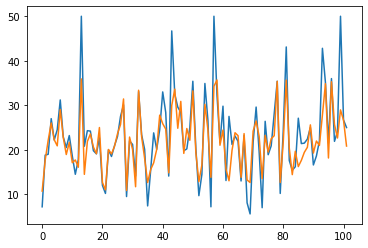

In [22]:
pylab.subplot (1, 1, 1)
pylab.plot (test_y, label="Тестовые значения")
pylab.plot (model.predict(test_x), label="Предсказанные значения")

На графике видно, что тестовые и предсказанные значения лежат очень близко друг к другу.

# Вывод
Использование разных функций потерь и оптимизаторов для ИНС с 1-2 слоями могут дать результат не хуже, чем увеличение количества слоёв ИНС от 3 и выше. В случае увеличения количества слоёв возрастает время обучения и инференса, в случае использования другого оптимизатора может возрасти время обучения. Без Dropout высокая вероятность переобучения. Нормализация слоёв и пачек может помочь, но не совсем понятно, по какому принципу ей пользоваться.